# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head(10)

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0
5,Здравствуйте. Я мама ребёнка инвалида 6 лет. З...,1,42.0
6,Я месяц назад начала общатся с иностранцем. Вс...,1,14.0
7,"Начну с начала, у меня есть мама, с ней очень ...",1,18.0
8,Первый и последний раз сходила к косметологу. ...,1,39.0
9,Этот год был очень трудным....,1,17.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [105]:
df["age"].value_counts()

1.600000e+01    1823
1.700000e+01    1811
1.800000e+01    1661
1.500000e+01    1582
2.000000e+01    1543
1.900000e+01    1402
2.100000e+01    1273
1.400000e+01    1228
2.200000e+01    1154
2.300000e+01    1120
2.500000e+01    1011
2.400000e+01     917
2.600000e+01     760
2.700000e+01     700
1.300000e+01     673
2.800000e+01     608
3.000000e+01     577
2.900000e+01     479
1.200000e+01     353
3.200000e+01     338
3.100000e+01     311
3.300000e+01     274
3.500000e+01     269
3.400000e+01     243
4.000000e+01     213
3.800000e+01     212
3.600000e+01     208
3.700000e+01     182
3.900000e+01     144
1.100000e+01     117
                ... 
1.250000e+02       1
3.650000e+02       1
2.728000e+03       1
1.214000e+03       1
1.230012e+09       1
2.025000e+03       1
6.800000e+01       1
1.090000e+02       1
2.000000e+02       1
1.550000e+02       1
6.900000e+01       1
1.650000e+02       1
1.318000e+03       1
2.122000e+03       1
2.223000e+03       1
2.650000e+02       1
6.660000e+02 

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [106]:
ok_age =  df[(df['age'] >= 14) & (df['age'] <= 50)]
mean_age = ok_age["age"].mean() 

In [107]:
mean_age

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [108]:
age_16 = df[df['age'] == 16]

In [109]:
n_16_yo_texts = not_ok_age.shape[0]
n_16_26_yo_texts = df[(df['age'] >= 16) & (df['age'] <= 26)].shape[0]
share_of_16_yo = n_16_yo_texts / n_16_26_yo_texts * 100

In [110]:
share_of_16_yo

12.59412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [111]:
n_28_or_30_yo_texts = df[(df['age'] == 28) | (df['age'] == 30)].shape[0]

In [112]:
n_28_or_30_yo_texts

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [113]:
df[(df['age'] >= 18) & (df['age'] <= 30)]["age"].value_counts()

18.0    1661
20.0    1543
19.0    1402
21.0    1273
22.0    1154
23.0    1120
25.0    1011
24.0     917
26.0     760
27.0     700
28.0     608
30.0     577
29.0     479
Name: age, dtype: int64

5. Сколько в датасете положительных / отрицательных примеров?

In [114]:
df['label'].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [2]:
import re

In [57]:
def sentence_count(text):
    text = re.sub('[!?]', '.', text)
    text = re.sub('\.{1,}', '.', text)
    try:
        n_sent = len(text.split('.')) - 1
        if text != '' and n_sent == 0:
            n_sent = 1
    except:
        n_sent = 0
    return n_sent

In [58]:
n_sents = []
for index, row in df.iterrows():
    n_sent = sentence_count(row['text'])
    n_sents.append(n_sent)

In [59]:
df['n_sent'] = n_sents

In [121]:
df.head(5)

,text,label,age,n_sent
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,16
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,7
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,21


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [3]:
from nltk.corpus import stopwords
ignored_words = stopwords.words("russian")

In [4]:
def tokenize(text):
    text = text.lower()
    text = re.sub('[^-А-ЯЁа-яё\d]', ' ', text)
    tokenized_text = text.split()
    clean_text = [word for word in tokenized_text if word not in ignored_words]
    return clean_text

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [117]:
n_tokens = []
for index, row in df.iterrows():
    n_token = len(tokenize(row['text']))
    n_tokens.append(n_token)
df['n_tokens'] = n_tokens

In [118]:
neg = df[(df['label'] == 1)]
pos = df[(df['label'] == 0)]

In [119]:
mean_neg_tok = neg["n_tokens"].mean() 
mean_pos_tok = pos["n_tokens"].mean() 
mean_tok = df["n_tokens"].mean() 

In [120]:
print(f'количество токенов в тексте по всей выборке {mean_tok}')
print(f'количество токенов в тексте внутри негативного класса {mean_neg_tok}')
print(f'количество токенов в тексте внутри позитивного класса {mean_pos_tok}')

количество токенов в тексте по всей выборке 106.25268976717312
количество токенов в тексте внутри негативного класса 70.50499718908114
количество токенов в тексте внутри позитивного класса 141.99703319696448


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [5]:
from pymystem3 import Mystem
m = Mystem()

In [6]:
def lemmatize(clean_text):
    words = " ".join(clean_text)
    lemmas = m.lemmatize(words)
    words = " ".join(lemmas)
    return words

In [51]:
lemmatize(['я', 'лошадью'])

'я   лошадь \n'

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [126]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [129]:
def pos(lemmas):
    pos_tags = []
    for i in lemmas.split():
        word = i
        word = morph.parse(word)[0]
        pos_tags.append(word.tag.POS)
    return pos_tags

In [49]:
pos('я лошадь')

['NPRO', 'NOUN']

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

В список стоп слов, помимо служебных и не супер значимых слов, можно добавить:

1) все числительные - первый, второй, тридцать три, потому что их много, а высокого смыслового различия (как между "офигенный" и "офигевший" например) между ними нет.

2) можно заменять всю брань словом "мат", потому что эти слова часты, но выражают скорее интенсивность эмоции, а не её характер.

3) слово очень, потому что оно тоже говорит лишь о степени, а не характере штуки

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from collections import Counter

In [75]:
n_sent_n_texts = Counter()
for index, row in df.iterrows():
    n_sent_n_texts[row['n_sent']] += 1

In [76]:
x = []
y = []
for i in n_sent_n_texts.most_common():
    x.append(i[0])
    y.append(i[1])

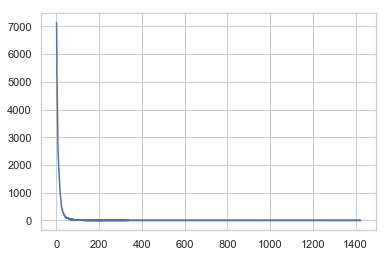

In [77]:
plt.plot(x,y)
plt.show()

здесь ось Х - количество предложений в тексте 
ось У - количество текстов

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [78]:
n_sent_n_texts_neg = Counter()
n_sent_n_texts_pos = Counter()
for index, row in df.iterrows():
    if row['label'] == 1:
        n_sent_n_texts_neg[row['n_sent']] += 1
    else:
        n_sent_n_texts_pos[row['n_sent']] += 1
    

Депрессивные

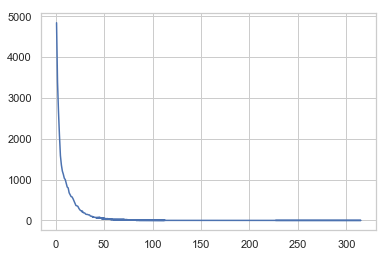

In [79]:
x = []
y = []
for i in n_sent_n_texts_neg.most_common():
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.show()

Не депрессивные

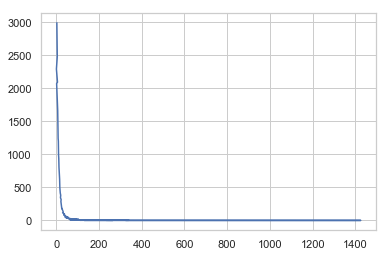

In [80]:
x = []
y = []
for i in n_sent_n_texts_pos.most_common():
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.show()

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [83]:
import seaborn as sn

In [84]:
age_group = df[(df['age'] >= 16) & (df['age'] <= 32)]


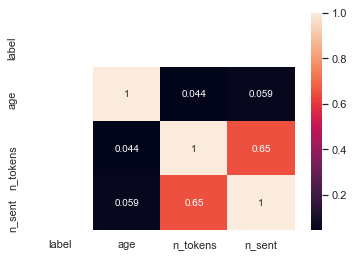

In [85]:
corrMatrix = age_group.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Верно. Корреляция положительная.

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [98]:
def char_ngrams(text, n):
    len_text = len(text)
    start = 0
    end = n
    n_grams = []
    for i in range(len_text):
        n_gram = text[start:end]
        start += 1
        end += 1
        n_grams.append(n_gram)
        if end > len_text:
            break
    return n_grams

In [99]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [102]:
def word_ngrams(text, n):
    len_text = len(text.split())
    tokens = text.split()
    start = 0
    end = n
    n_grams = []
    for i in range(len_text):
        n_gram = tokens[start:end]
        start += 1
        end += 1
        n_grams.append(n_gram)
        if end > len_text:
            break
    return n_grams

In [103]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [104]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [123]:
def lemma_ngrams(text, n):
    tokens = tokenize(text)
    lemmas = lemmatize(tokens)
    lemmas = lemmas.split()
    len_text = len(lemmas)
    start = 0
    end = n
    n_grams = []
    for i in range(len_text):
        n_gram = lemmas[start:end]
        start += 1
        end += 1
        n_grams.append(n_gram)
        if end > len_text:
            break
    return n_grams

Мне больше нравится отдавать список списков лемм, а не список списков списков лемм

In [124]:
# пример работы функции

lemma_ngrams(text, n=3)

[['уставать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рама']]

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[[['устать'], ['мама'], ['мыло']],
 [['мама'], ['мыло'], ['грязный']],
 [['мыло'], ['грязный'], ['рам']]]

In [125]:
lemma_ngrams(text, n=4)

[['уставать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рама']]

In [ ]:
lemma_ngrams(text, n=4)

[[['устать'], ['мама'], ['мыло'], ['грязный']],
 [['мама'], ['мыло'], ['грязный'], ['рам']]]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [132]:
def pos_ngrams(text, n):
    tokens = tokenize(text)
    lemmas = lemmatize(tokens)
    pos_tags = pos(lemmas)
    len_text = len(pos_tags)
    start = 0
    end = n
    n_grams = []
    for i in range(len_text):
        n_gram = pos_tags[start:end]
        start += 1
        end += 1
        n_grams.append(n_gram)
        if end > len_text:
            break
    return n_grams

In [133]:
# пример работы функции

pos_ngrams(text, n=3)

[['INFN', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [134]:
pos_ngrams(text, n=4)

[['INFN', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [136]:
def build_pos_dict(corpus):
    pos_tags_corpus = {}
    for doc in corpus:
        tokens = tokenize(text)
        lemmas = lemmatize(tokens)
        pos_tags = pos(lemmas)
        for tag in pos_tags:
            try:
                pos_tags_corpus[tag] += 1
            except KeyError:
                pos_tags_corpus[tag] = 1
    return pos_tags_corpus

In [137]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 4, 'INFN': 4, 'NOUN': 12}

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [7]:
neg_texts = df[(df['label'] == 1)]
pos_texts = df[(df['label'] == 0)]

In [8]:
def build_lem_dict(corpus_df):
    lemmas_corpus = {}
    for index, row in corpus_df.iterrows():
        text = row['text']
        tokens = tokenize(text)
        lemmas = lemmatize(tokens)
        lemmas = lemmas.split()
        for lemma in lemmas:
            try:
                lemmas_corpus[lemma] += 1
            except KeyError:
                lemmas_corpus[lemma] = 1
    return lemmas_corpus

In [9]:
neg_lemmas = build_lem_dict(neg_texts)
pos_lemmas = build_lem_dict(pos_texts)

In [12]:
neg_lemmas_sorted = {k: v for k, v in sorted(neg_lemmas.items(), key=lambda item: item[1])}

In [17]:
neg_lemmas_sorted = sorted(neg_lemmas.items(), key=lambda x: x[1], reverse=True)
pos_lemmas_sorted = sorted(pos_lemmas.items(), key=lambda x: x[1], reverse=True)

In [21]:
pos_lemmas_sorted[:15]

[('-', 193531),
 ('год', 43617),
 ('который', 26288),
 ('1', 19038),
 ('проект', 16961),
 ('новый', 15884),
 ('2', 15853),
 ('наш', 15580),
 ('свой', 15454),
 ('день', 14943),
 ('это', 14768),
 ('город', 14707),
 ('работа', 14371),
 ('апрель', 14086),
 ('2019', 13824)]

In [22]:
neg_lemmas_sorted[:15]

[('это', 31145),
 ('год', 28086),
 ('-', 27638),
 ('жить', 25818),
 ('хотеть', 24563),
 ('жизнь', 24424),
 ('мочь', 21381),
 ('человек', 19366),
 ('очень', 18572),
 ('мой', 18202),
 ('знать', 16766),
 ('просто', 16480),
 ('который', 14938),
 ('свой', 14536),
 ('все', 12552)]

Да, пересечение есть. 5 лемм: это, год, -, который, свой

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

1) Капитализация - она есть и обычная, она НеОбЫчНаЯ, её нет - понадобятся только встроенные питоновские штуки

2) Смайлики, эмоджи - у hugginface есть штука, чтобы их парсить. 

3) Именованные сущности, можно начать с городов, тогда Наташи достаточно. Интересно, в каких городах люди пишут меньше депрессивных постов?

4) Пунктуация -  грустнее ли люди, которые пишут .... ? Достаточно питона как он есть

